In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('historical-non_brand_search.csv')

In [5]:
df.describe()

,Cost,Quotes,Sales,CPQ,CPS,CPC
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,193643.103544,3169.683544,226.164557,50.445551,714.612948,21.997468
std,146283.559427,2023.391932,143.596249,20.888178,328.622873,10.862459
min,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,44715.285000,1239.000000,89.000000,37.014637,473.752772,12.800000
50%,197840.280000,3609.000000,273.000000,56.580129,763.178385,23.280000
75%,322111.345000,4938.000000,348.000000,66.539326,993.108194,31.765000
max,454271.660000,6809.000000,513.000000,90.630828,1297.971957,37.290000


In [6]:
df['clicks']=df['Cost']/df['CPC']

In [7]:
df.dtypes

Week       object
Cost      float64
Quotes      int64
Sales       int64
CPQ       float64
CPS       float64
CPC       float64
clicks    float64
dtype: object

In [8]:
df.corr()

,Cost,Quotes,Sales,CPQ,CPS,CPC,clicks
Cost,1.000000,0.982842,0.935732,0.839488,0.827154,0.815560,0.824691
Quotes,0.982842,1.000000,0.975583,0.808691,0.777096,0.819231,0.791531
Sales,0.935732,0.975583,1.000000,0.766345,0.687311,0.771187,0.770521
CPQ,0.839488,0.808691,0.766345,1.000000,0.963839,0.873987,0.710610
CPS,0.827154,0.777096,0.687311,0.963839,1.000000,0.876587,0.660716
CPC,0.815560,0.819231,0.771187,0.873987,0.876587,1.000000,0.422233
clicks,0.824691,0.791531,0.770521,0.710610,0.660716,0.422233,1.000000


In [12]:
Brand_df.dtypbes

Date             object
Cost            float64
Impressions     float64
Clicks          float64
CPC             float64
CTR             float64
Close Rate      float64
Quotes          float64
Sales           float64
CPQ             float64
CPS             float64
dtype: object

In [21]:
Brand_df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Date', 'Cost', 'Impressions ', 'Clicks ', 'CPC ', 'CTR ',
       'Close Rate ', 'Quotes ', 'Sales ', 'CPQ ', 'CPS '],
      dtype='object')>

In [13]:
Brand_df.corr()

,Cost,Impressions,Clicks,CPC,CTR,Close Rate,Quotes,Sales,CPQ,CPS
Cost,1.000000,0.511586,0.977325,0.862481,0.914536,0.062554,0.978734,0.962179,0.218729,-0.021277
Impressions,0.511586,1.000000,0.558816,0.227006,0.290754,0.133425,0.516362,0.531055,0.252967,-0.067009
Clicks,0.977325,0.558816,1.000000,0.765388,0.904367,0.077209,0.994642,0.980469,0.098092,-0.091896
CPC,0.862481,0.227006,0.765388,1.000000,0.879905,-0.065878,0.800151,0.751604,0.352460,0.154866
CTR,0.914536,0.290754,0.904367,0.879905,1.000000,-0.062034,0.927911,0.875626,0.046351,0.002818
Close Rate,0.062554,0.133425,0.077209,-0.065878,-0.062034,1.000000,0.043736,0.175974,0.162990,-0.763577
Quotes,0.978734,0.516362,0.994642,0.800151,0.927911,0.043736,1.000000,0.977814,0.066542,-0.078460
Sales,0.962179,0.531055,0.980469,0.751604,0.875626,0.175974,0.977814,1.000000,0.089666,-0.162232
CPQ,0.218729,0.252967,0.098092,0.352460,0.046351,0.162990,0.066542,0.089666,1.000000,0.292783
CPS,-0.021277,-0.067009,-0.091896,0.154866,0.002818,-0.763577,-0.078460,-0.162232,0.292783,1.000000


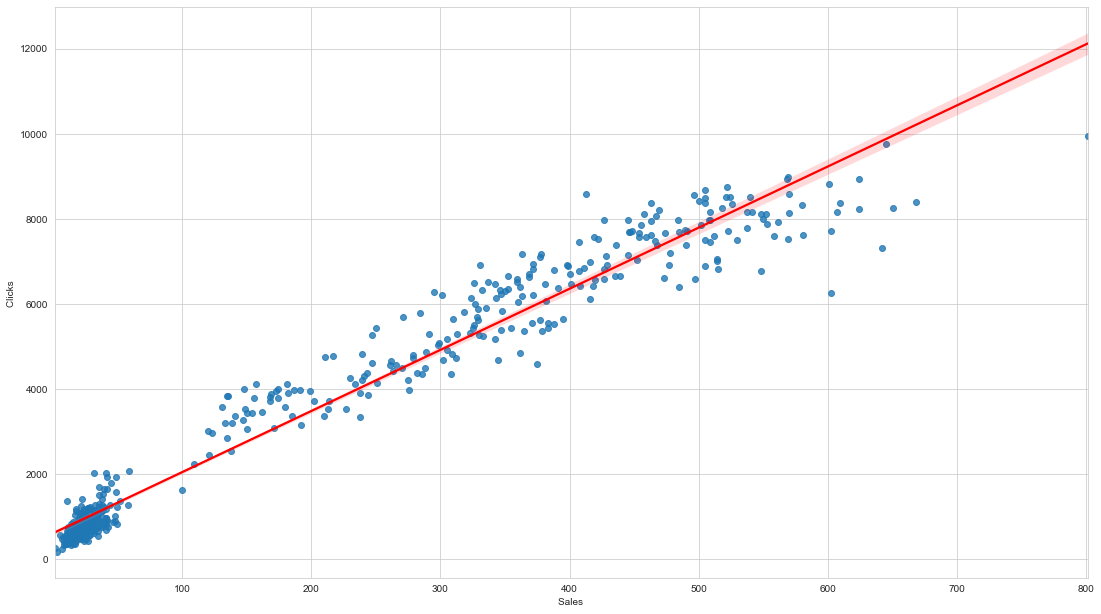

In [17]:
sns.set_style('whitegrid')

g = sns.regplot(x=Brand_df['Sales '],y=Brand_df['Clicks '], x_ci=[0,2],line_kws={"color": "red"})
g.figure.set_size_inches(18.5,10.5)

In [24]:
Brand_df['Date'] = pd.to_datetime(Brand_df['Date'], format= '%m/%d/%Y')

In [25]:
test_df = Brand_df[Brand_df['Date'] >= '2020-10-01'] # create testing data set 
train_df = Brand_df[Brand_df['Date'] < '2020-10-01'] # create training data set

In [26]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
X_train = np.array(train_df['Clicks '])
Y_train = np.array(train_df['Sales '])
X_test = np.array(test_df['Clicks '])
Y_test = np.array(test_df['Sales '])

In [46]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train.reshape(-1,1), Y_train.reshape(-1,1))


LinearRegression()

In [47]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[0.06818883]]


In [48]:
# Make predictions using the testing set
test_y_pred = regr.predict(X_test.reshape(-1, 1))

array([[ 3.30611201e+01],
       [ 4.78197812e+02],
       [ 1.47865132e+01],
       [ 4.80448043e+02],
       [ 3.33078955e+00],
       [ 2.89246560e+02],
       [ 6.60385346e+00],
       [ 2.27058346e+02],
       [ 3.32656866e+01],
       [ 4.72810894e+02],
       [ 1.43091914e+01],
       [ 4.01553565e+02],
       [ 1.39000584e+01],
       [ 3.89075009e+02],
       [ 2.76060136e+01],
       [ 4.09599848e+02],
       [ 1.92869761e+01],
       [ 4.39466556e+02],
       [ 3.33078955e+00],
       [ 2.77177137e+02],
       [-5.46556971e+00],
       [ 2.04078709e+02],
       [ 1.15134493e+01],
       [ 3.84438169e+02],
       [ 1.38318696e+01],
       [ 3.90166031e+02],
       [ 2.35146837e+01],
       [ 4.14441255e+02],
       [ 1.81959548e+01],
       [ 4.32579484e+02],
       [ 1.52638351e+01],
       [ 4.24874146e+02],
       [ 1.51956462e+01],
       [ 2.83450509e+02],
       [-6.89753517e+00],
       [ 2.19216630e+02],
       [ 2.01052421e+01],
       [ 4.44989851e+02],
       [ 8.6